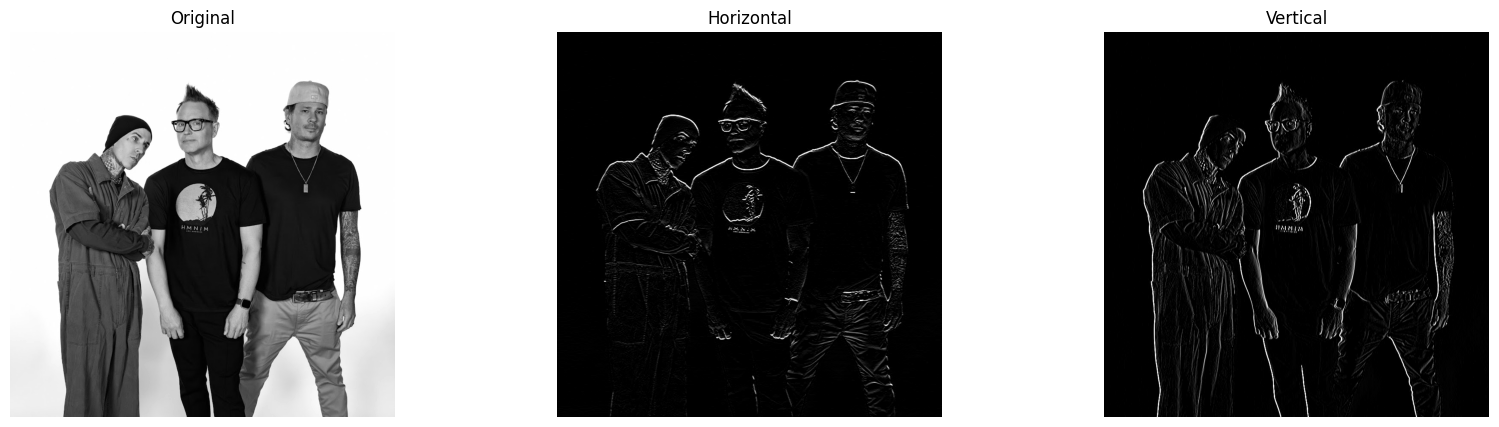

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_path = 'data/faces.jpg'

img = cv.imread(img_path)

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

kernel1 = np.array([[1, 1, 1],
                    [0, 0, 0],
                    [-1, -1, -1]], np.float32)

kernel2 = np.array([[1, 0, -1],
                    [1, 0, -1],
                    [1, 0, -1]], np.float32)

horizontal = cv.filter2D(img_gray, 0, kernel1)

vertical = cv.filter2D(img_gray, 0, kernel2)

# cv.imshow('original', img_gray)
# cv.imshow('filter', horizontal)
# cv.imshow('filter_vertical', vertical)
# cv.waitKey(0)
# cv.destroyAllWindows()

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(horizontal, cmap='gray')
axes[1].set_title("Horizontal")
axes[1].axis('off')

axes[2].imshow(vertical, cmap='gray')
axes[2].set_title("Vertical")
axes[2].axis('off')


plt.show()

In [91]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_path = 'data/soduku.jpg'

img = cv.imread(img_path)

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

kernel_horizontal = np.array([[-1, -1, -1],
                               [-1,  8, -1],
                               [-1, -1, -1]])

filter_result = cv.filter2D(img_gray, -1, kernel_horizontal)

something = cv.absdiff(img_gray, filter_result)

cv.imshow('original', img_gray)
cv.imshow('filter', filter_result)
cv.imshow('edges', something)
cv.waitKey(0)
cv.destroyAllWindows()


In [90]:
import cv2
import numpy as np

img_path = 'data/goku.jpg'
img = cv2.imread(img_path)

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

cv2.imshow('Original Image', img)
cv2.imshow('Transformed Image', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [89]:
import cv2

img_path = 'data/faces.jpg'
img = cv2.imread(img_path)

rows, cols = img.shape[:2]

M = cv2.getRotationMatrix2D((cols/2, rows/2), 135, 1)

img_transformed = cv2.warpAffine(img, M, (cols, rows), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))

cv2.imshow('Original', img)
cv2.imshow('Transformed', img_transformed)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [2]:
import cv2 as cv
import matplotlib.pyplot as plt

def thresh_update(val):
    low = cv.getTrackbarPos('Low Threshold', source_window)
    high = cv.getTrackbarPos('High Threshold', source_window)

    edges = cv.Canny(gray, low, high)
    contours, _ = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    contour_image = image.copy()
    cv.drawContours(contour_image, contours, -1, (0, 255, 0), 1)

    cv.imshow(source_window, contour_image)


    # plt.figure(figsize=(12, 6))
    # plt.subplot(121)
    # plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # plt.title('Original Image')
    # plt.axis('off')
    #
    # plt.subplot(122)
    # plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
    # plt.title('Contours')
    # plt.axis('off')
    #
    # plt.show()


image = cv.imread('data/goku.jpg')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

low_threshold = 50
high_threshold = 180

source_window = 'Source'
cv.namedWindow(source_window)

cv.createTrackbar('Low Threshold', source_window, low_threshold, 255, thresh_update)
cv.createTrackbar('High Threshold', source_window, high_threshold, 255, thresh_update)

thresh_update(0)

cv.waitKey(0)
cv.destroyAllWindows()



error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:866: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


In [33]:
import cv2

def update_canny_thresholds(*args):
    global edges
    low_threshold = cv2.getTrackbarPos('Low Threshold', 'Edges')
    high_threshold = cv2.getTrackbarPos('High Threshold', 'Edges')

    edges = cv2.Canny(gray, low_threshold, high_threshold)

    cv2.imshow('Edges', edges)

image = cv2.imread('data/kobe.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

low_threshold = 50
high_threshold = 150
edges = cv2.Canny(gray, low_threshold, high_threshold)

cv2.namedWindow('Edges')
cv2.imshow('Edges', edges)

cv2.createTrackbar('Low Threshold', 'Edges', low_threshold, 255, update_canny_thresholds)
cv2.createTrackbar('High Threshold', 'Edges', high_threshold, 255, update_canny_thresholds)

update_canny_thresholds()

cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:866: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'
